In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from xgboost import XGBClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset=pd.read_csv('/content/Rainfall.csv')
dataset.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [3]:
dataset.shape

(366, 12)

In [4]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
day,366.0,15.756831,8.823592,1.0,8.000,16.00,23.000,31.0
pressure,366.0,1013.742623,6.414776,998.5,1008.500,1013.00,1018.100,1034.6
maxtemp,366.0,26.191257,5.978343,7.1,21.200,27.75,31.200,36.3
temparature,366.0,23.747268,5.632813,4.9,18.825,25.45,28.600,32.4
mintemp,366.0,21.894536,5.594153,3.1,17.125,23.70,26.575,30.0
dewpoint,366.0,19.989071,5.997021,-0.4,16.125,21.95,25.000,26.7
humidity,366.0,80.177596,10.062470,36.0,75.000,80.50,87.000,98.0
cloud,366.0,71.128415,21.798012,0.0,58.000,80.00,88.000,100.0
sunshine,366.0,4.419399,3.934398,0.0,0.500,3.50,8.200,12.1
winddirection,365.0,101.506849,81.723724,10.0,40.000,70.00,190.000,350.0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [6]:
dataset.isnull()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
361,False,False,False,False,False,False,False,False,False,False,False,False
362,False,False,False,False,False,False,False,False,False,False,False,False
363,False,False,False,False,False,False,False,False,False,False,False,False
364,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
dataset.isnull().sum()

,0
day,0
pressure,0
maxtemp,0
temparature,0
mintemp,0
dewpoint,0
humidity,0
cloud,0
rainfall,0
sunshine,0


In [8]:
scr=dataset.columns
scr

Index(['day', 'pressure ', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity ', 'cloud ', 'rainfall', 'sunshine', '         winddirection',
       'windspeed'],
      dtype='object')

In [9]:
for col in dataset.columns:
    if dataset[col].isnull().sum()>0:
      value=dataset[col].mean()
      dataset[col]=dataset[col].fillna(value)

dataset.isnull().sum()

,0
day,0
pressure,0
maxtemp,0
temparature,0
mintemp,0
dewpoint,0
humidity,0
cloud,0
rainfall,0
sunshine,0


In [10]:
dataset.isnull().sum().sum()

np.int64(0)

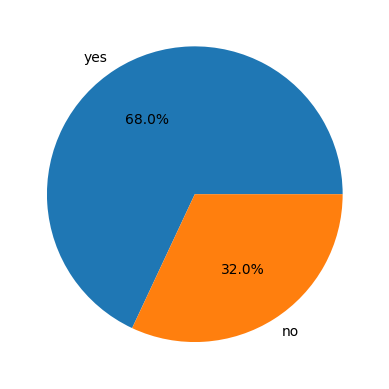

In [11]:
plt.pie(dataset['rainfall'].value_counts(),labels=dataset['rainfall'].value_counts().index,autopct='%1.1f%%')
plt.show()

In [12]:
dataset.drop('day',axis=1,inplace=True)
dataset.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [13]:
dataset.replace({'no': 0,'yes':1},inplace=True)
dataset.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,1,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,1,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95,91,1,0.0,40.0,14.2
3,1018.9,22.3,20.6,19.1,18.8,90,88,1,1.0,50.0,16.9
4,1015.9,21.3,20.7,20.2,19.9,95,81,1,0.0,40.0,13.7


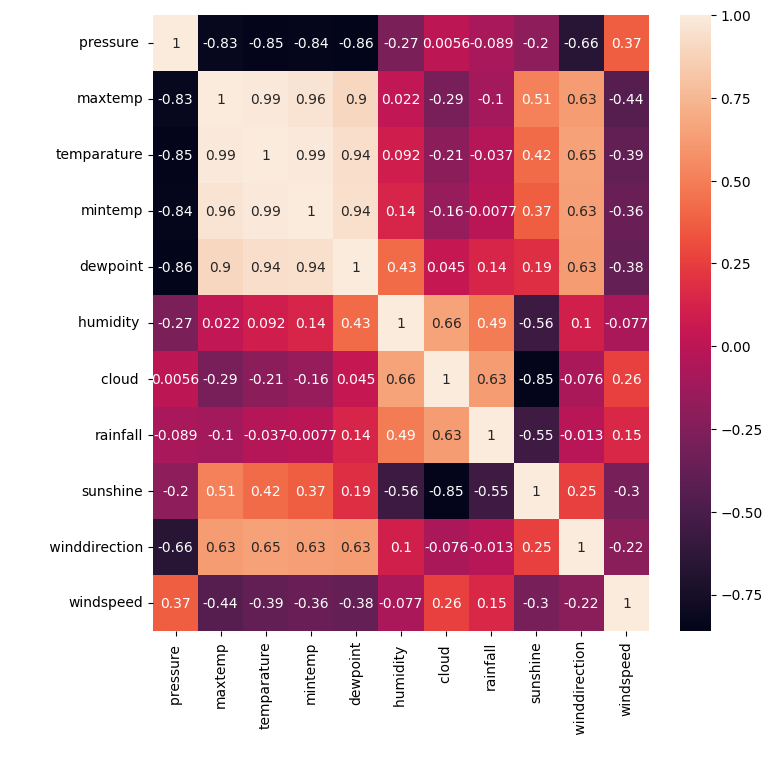

In [14]:
plt.figure(figsize=(8,8))
sns.heatmap(dataset.corr(),annot=True)
plt.show()

In [15]:
dataset.drop(['maxtemp', 'mintemp'],axis=1,inplace=True)
dataset.head(8)

,pressure,temparature,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,18.3,13.1,72,49,1,9.3,80.0,26.3
1,1022.0,18.9,15.6,81,83,1,0.6,50.0,15.3
2,1019.7,19.3,18.4,95,91,1,0.0,40.0,14.2
3,1018.9,20.6,18.8,90,88,1,1.0,50.0,16.9
4,1015.9,20.7,19.9,95,81,1,0.0,40.0,13.7
5,1018.8,20.9,18.0,84,51,1,7.7,20.0,14.5
6,1021.8,18.8,15.0,79,56,0,3.4,30.0,21.5
7,1020.8,18.4,14.4,78,28,0,7.7,60.0,14.3


In [16]:
x=dataset.drop('rainfall',axis=1)
y=dataset['rainfall']

In [17]:
x.head(3)

,pressure,temparature,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,1025.9,18.3,13.1,72,49,9.3,80.0,26.3
1,1022.0,18.9,15.6,81,83,0.6,50.0,15.3
2,1019.7,19.3,18.4,95,91,0.0,40.0,14.2


In [18]:
y.head(3)

,rainfall
0,1
1,1
2,1


In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.45,random_state=42)

In [20]:
xtr=x_train.shape
xte=x_test.shape
ytr=y_train.shape
yte=y_test.shape
print(xtr,xte,ytr,yte)

(201, 8) (165, 8) (201,) (165,)


In [21]:
# As the data was highly imbalanced we will balance it by adding repetitive rows of minority class.
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler(sampling_strategy='minority',random_state=42)
X,Y=ros.fit_resample(x_train,y_train)
X.shape,Y.shape

((270, 8), (270,))

In [22]:
scaler=StandardScaler()
X=scaler.fit_transform(X)
x_test=scaler.transform(x_test)

In [23]:
from sklearn import metrics
models = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf', probability=True)]

for i in range(3):
  models[i].fit(X, Y)

  print(f'{models[i]} : ')

  train_preds = models[i].predict_proba(X)
  print('Training Accuracy : ', metrics.roc_auc_score(Y, train_preds[:,1]))

  test_preds = models[i].predict_proba(x_test)
  print('Testing Accuracy : ', metrics.roc_auc_score(y_test, test_preds[:,1]))
  print()

LogisticRegression() : 
Training Accuracy :  0.8966803840877915
Testing Accuracy :  0.848297213622291

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...) : 
Training Accuracy :  1.0
Testing Accuracy :  0.8094255245958033

SVC(probability=True) : 
Training Accuracy :  0.9270233196159122
Tes